In [22]:
from morfessor import BaselineModel, MorfessorIO
from gensim.models import Word2Vec

In [23]:
io_handler = MorfessorIO()
model = io_handler.read_binary_model_file('../morfessor/morf_isc_model.bin')

In [66]:
def segment_words(model, words):
    segmented_words = []
    for word in words:
        try:
            # Try to segment the word using the model analyses
            segments = model.segment(word)
        except KeyError:
            # If the word is not in the training data, use viterbi_segment
            segments = model.viterbi_segment(word)[0]
        segmented_words.extend(segments)  
    return segmented_words

In [25]:
with open('../data/isc_sentences.txt', 'r') as f:
    sentences = f.readlines()

In [69]:
sentences_segmented = [segment_words(model, sentence.split()) for sentence in sentences]

# Train Word2Vec model on segmented sentences
w2v_segmented = Word2Vec(sentences_segmented, vector_size=32, window=5, min_count=1, workers=4)

In [70]:
w2v_segmented.save("iscmorf2vec.model")

In [86]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_embeddings_2D(words, vectors, dimension='tsne'):
    """Visualize word vectors in 2D using t-SNE or PCA."""
    # Reduce dimensionality using t-SNE
    if dimension == 'tsne':
        perplexity = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
        reduced_vectors = tsne.fit_transform(vectors)
    # Reduce dimensionality using PCA
    # elif dimension == 'pca':
    #     pca = PCA(n_components=2)
    #     reduced_vectors = pca.fit_transform(vectors)
    else:
        raise ValueError("Invalid dimension specified. Use 'tsne' or 'pca'.")

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    # Annotate each point with the corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    plt.title(f'Visualización 2D de los vectores - Morfessor y word2vec ({dimension.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid()
    plt.show()

In [ ]:
import random
word_list = list(w2v_segmented.wv.key_to_index.keys())

In [ ]:
# Sample 20 words from the list
sampled_words = random.sample(word_list, 20)
# Get the word vectors for the sampled words
word_vectors = np.array([w2v_segmented.wv[word] for word in sampled_words])

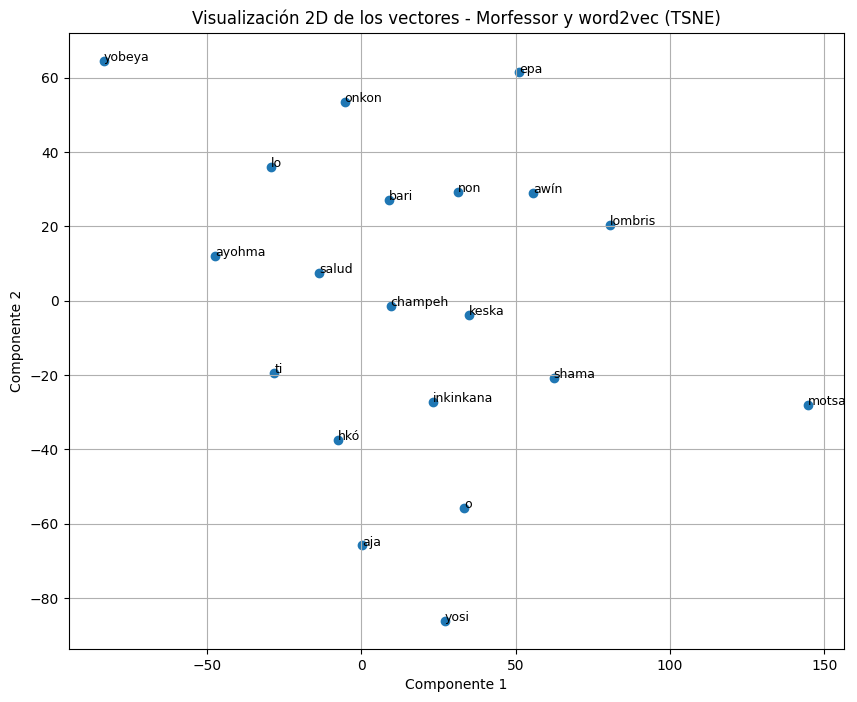

In [87]:
visualize_embeddings_2D(sampled_words,word_vectors)